In [1]:
import cv2 as cv
# from scipy.fftpack import fft2, ifft2, fftshift, ifftshift, rfft, irfft
import time
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift, rfft2, irfft2
from matplotlib import pyplot as plt
from tqdm import tqdm, trange
from scipy import ndimage
from scipy.signal import convolve2d, fftconvolve

(1600, 1182, 3) (1204, 767, 3)
(1204, 767, 3) (1204, 767, 3)


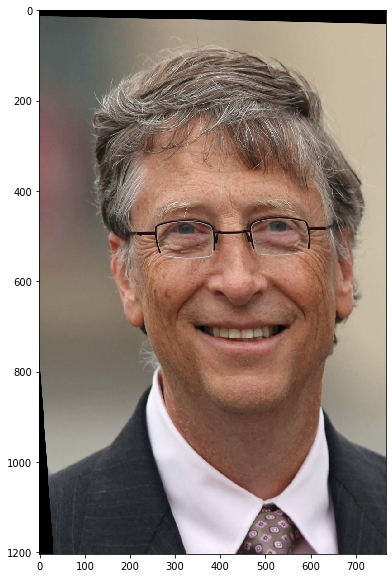

In [2]:
img_near = plt.imread("C:/Users/nimac/MyProjects/vision/HW/HW2/Q4_01_near.jpg")
img_far = plt.imread("C:/Users/nimac/MyProjects/vision/HW/HW2/Q4_02_far.jpg")
# img_near = plt.imread("C:/Users/nimac/MyProjects/vision/HW/HW2/1-G.jpg")
# img_far = plt.imread("C:/Users/nimac/MyProjects/vision/HW/HW2/4-M.jpg")

img_near = np.uint32(img_near)
img_far = np.uint32(img_far)

# img_near = img_near[300:-300,216:-216, :]
# img_far = img_far[:,:,:]

# ix, iy = 1, 1
# def func(event,x,y,flags,param):
#     global ix,iy
#     if event == cv.EVENT_LBUTTONDBLCLK:
#         ix,iy = x,y
    
# cv.setMouseCallback('base',func)

# while(1):
#     cv.imshow("base", np.uint8(img_near))
#     k = cv.waitKey(20) & 0xFF
#     if k == 27:
#         break
#     elif k == ord('a'):
#         print(ix,iy)
# cv.waitKey(0)

# while(1):
#     cv.imshow("base", np.uint8(img_far))
#     k = cv.waitKey(20) & 0xFF
#     if k == 27:
#         break
#     elif k == ord('a'):
#         print(ix,iy)
# cv.waitKey(0)


print(img_near.shape, img_far.shape)

p = (436, 526, 701, 515, 574, 801, 323, 480, 531, 475, 449, 723)
# 430 529 701 522 574 798 332 328 490 342 411 510
near_points = np.array([[p[0], p[1]], [p[2], p[3]], [p[4], p[5]]], np.float32)
far_points = np.array([[p[6], p[7]], [p[8], p[9]], [p[10], p[11]]], np.float32)

# near_points = np.array([[p[0], p[1]], [p[2], p[3]]], np.float32)
# far_points = np.array([[p[6], p[7]], [p[8], p[9]]], np.float32)

# sim_trans = cv.estimateAffinePartial2D(near_points, far_points)[0]
# print(sim_trans)
aff_trans = cv.getAffineTransform(near_points, far_points)
img_near = cv.warpAffine(np.uint8(img_near), aff_trans, (img_far.shape[-2], img_far.shape[-3]))
print(img_near.shape, img_far.shape)
plt.figure(figsize=(10,10))
plt.imshow(img_near)
plt.show()

plt.imsave("Q4_03_near.jpg", np.uint8(img_near))
plt.imsave("Q4_04_far.jpg", np.uint8(img_far))


r_far = img_far[:,:, 0]
g_far = img_far[:,:, 1]
b_far = img_far[:,:, 2]
color_far = [r_far, g_far, b_far]
r_near = img_near[:,:, 0]
g_near = img_near[:,:, 1]
b_near = img_near[:,:, 2]
color_near = [r_near, g_near, b_near]

color_far_fft = [fftshift(fft2(x)) for x in color_far]
color_near_fft = [fftshift(fft2(x)) for x in color_near]

<div dir="rtl">
    در اینجا ابتدا کانال های تصویر را جدا کردیم و تابع فوریه را روی هر کدام حساب کردیم
    
</div>

In [16]:
def get_logamp_nor(mat):
    mat2 = np.log(np.abs(mat))
    mat2 = mat2-np.min(mat2)
    mat2 = mat2/np.max(mat2)
    return mat2
    
logamp_far = [get_logamp_nor(x) for x in color_far_fft]
logamp_near = [get_logamp_nor(x) for x in color_near_fft]
res_logamp_far = np.array([[[r, g, b] for r, g, b in zip(r_r, g_r, b_r)] for r_r,g_r,b_r in zip(logamp_far[0],
                                                                                       logamp_far[1],logamp_far[2])])

res_logamp_near = np.array([[[r, g, b] for r, g, b in zip(r_r, g_r, b_r)] for r_r,g_r,b_r in zip(logamp_near[0],
                                                                                       logamp_near[1],logamp_near[2])])
print(res_logamp_near.shape, res_logamp_far.shape)
plt.imsave("Q4_05_dft_near.jpg", res_logamp_near)
plt.imsave("Q4_06_dft_far.jpg", res_logamp_far)


(1204, 767, 3) (1204, 767, 3)


<div dir="rtl">
در اینجا مقدار لگاریتم ضرایب فوریه را حساب کرده و ذخیره کردیم
</div>


C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


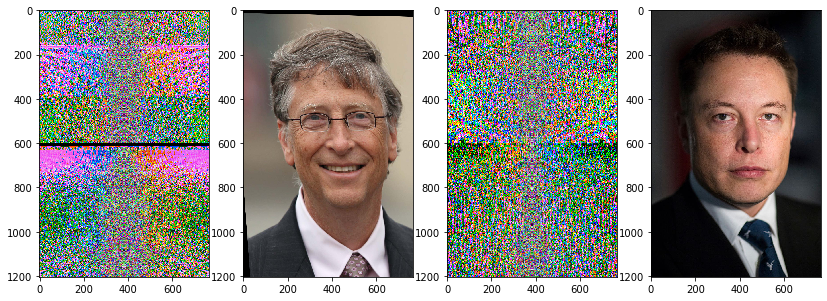

In [17]:
def show_heatmap(mat, pl=plt):
    pl.imshow(mat, cmap='hot', interpolation='nearest')


_, axs = plt.subplots(1, 4, figsize=(14, 14))
axs = axs.flatten()
axs[0].imshow(np.uint8(fftshift(fft2(img_near))))
axs[1].imshow(np.uint8(img_near))
axs[2].imshow(np.uint8(fftshift(fft2(img_far))))
axs[3].imshow(np.uint8(img_far))
plt.show()


<div dir="rtl">
    دراینجا تصویرها و تبدیل شده آنها به مختصات فرکانس را نشان داده ایم
</div>

0.0 0.00062139553
0.0 1.0


C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part


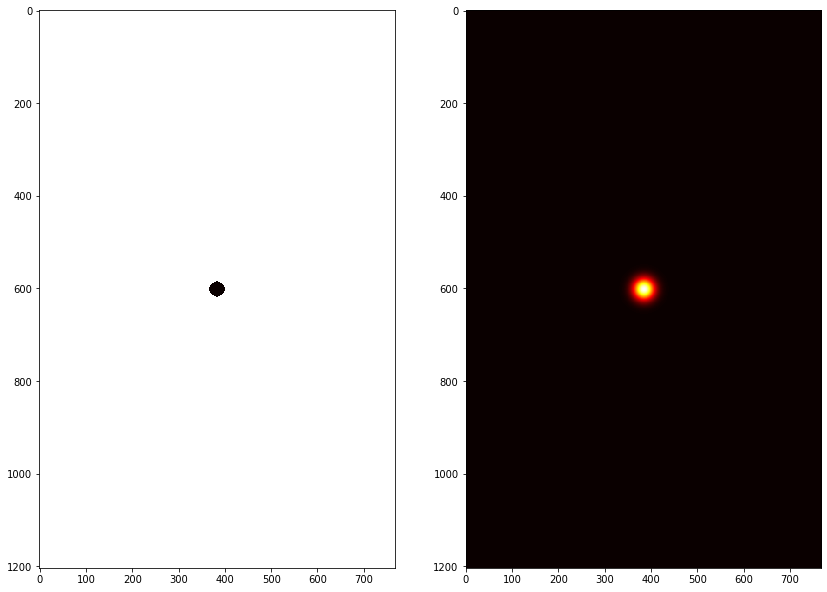

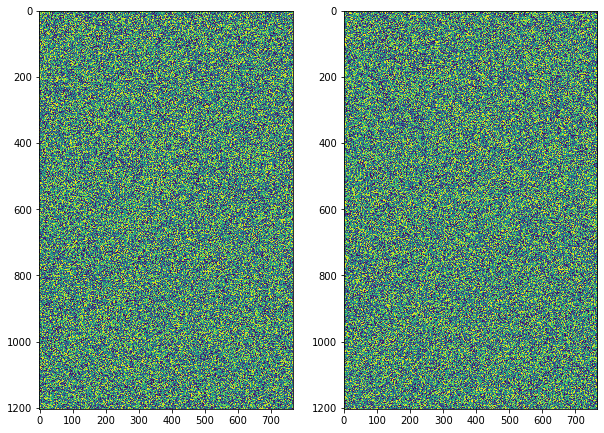

C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:55: ComplexWarning: Casting complex values to real discards the imaginary part


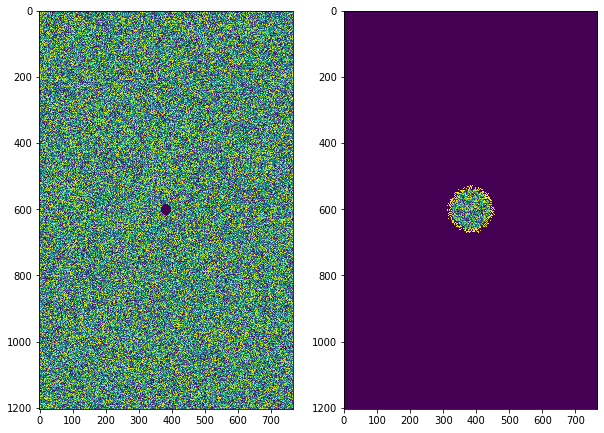

In [32]:
def make_img_from_list(mat):
    return np.array([[[r, g, b] for r, g, b in zip(r_r, g_r, b_r)] for r_r,g_r,b_r in zip(mat[0], mat[1], mat[2])])
def get_gauss(FILTER_SIZE, STD):
    gauss1d_col = np.array(cv.getGaussianKernel(FILTER_SIZE[0], STD, cv.CV_32F))
    gauss1d_row = np.array(cv.getGaussianKernel(FILTER_SIZE[1], STD, cv.CV_32F)).transpose()
    gauss2d = np.dot(gauss1d_col, gauss1d_row)
    gauss2d_c = np.ones((FILTER_SIZE[0], FILTER_SIZE[1])) - gauss2d
    gauss2d_c_cut = gauss2d_c.copy()
    gauss2d_cut = gauss2d.copy()
    gauss2d_c_cut[(gauss2d_c_cut < gauss2d_c_cut[STD, 0])] = 0
    gauss2d_cut[(gauss2d_cut < gauss2d_cut[STD, 0])] = 0
    return gauss2d, gauss2d_c, gauss2d_cut, gauss2d_c_cut

NEAR_STD = 2
FAR_STD = 16
_,g_near,_,gauss_near = get_gauss(img_near.shape[0:2], NEAR_STD)
g_far,_,gauss_far,_ = get_gauss(img_far.shape[0:2], FAR_STD)
print(gauss_far.min(), gauss_far.max())
print(gauss_near.min(), gauss_near.max())
plt.imsave(f"Q4_07_highpass_{NEAR_STD}.jpg", g_near)
plt.imsave(f"Q4_08_lowpass_{FAR_STD}.jpg", g_far)
plt.imsave(f"Q4_09_highpass_cutofff.jpg", gauss_near)
plt.imsave(f"Q4_10_lowpass_cutoff.jpg", gauss_far)

_, axs = plt.subplots(1, 2, figsize=(14, 14))
axs = axs.flatten()
show_heatmap(gauss_near, axs[0])
show_heatmap(gauss_far, axs[1])


# conv_near = [np.abs(convolve2d(x, gauss_near, mode='same')) for x in tqdm(color_near_fft)]
# conv_far = [np.abs(convolve2d(x, gauss_near, mode='same')) for x in tqdm(color_far_fft)]
conv_near = [((1/gauss_near.max())*x) * gauss_near for x in color_near_fft]
conv_far = [((1/gauss_far.max())*x) * gauss_far for x in color_far_fft]

conv_near_img = make_img_from_list(conv_near)
conv_far_img = make_img_from_list(conv_far)
plt.imsave(f"Q4_11_highpassed.jpg", np.uint8(conv_near_img))
plt.imsave(f"Q4_12_lowpassed.jpg", np.uint8(conv_far_img))


# conv_near = [x for x in color_near_fft]
# conv_far = [x for x in color_far_fft]

_, axs = plt.subplots(1, 2, figsize=(10, 10))
axs = axs.flatten()
axs[0].imshow(np.uint8(color_near_fft[0]))
axs[1].imshow(np.uint8(color_far_fft[0]))
plt.show()


_, axs = plt.subplots(1, 2, figsize=(10, 10))
axs = axs.flatten()
axs[0].imshow(np.uint8(conv_near[0]))
axs[1].imshow(np.uint8(conv_far[0]))
plt.show()


<div dir="rtl">
طبق خواسته سوال، از یک فیلتر گاوسی به اندازه تصویر استفاده کرده ایم که به صورت هیت مپ نشان داده ایم. سپس برای تست، روی کانال قرمز تصویر ابتدا در مختصات فرکانس آن را نشان داده ایم و سپس تصویر آن پس از استفاده از فیلتر را نشان داده ایم
</div>
<div dir="rtl">
    مقدار انحراف معیار هم برای نزدیک و دور به ترتیب ۲و ۱۶ است
</div>
<div dir="rtl">
کههبرای کات آف نیز از این تکنیک استفاده کرده ایم که فیلتر دو بعدی گاوس در هر راستا متقارن است و اگر بگوییم که مقادیر کمتر یا بیشتر از یک عدد را صفر بگذار، می شود یک دایره تو پر یا توخالی که همان تعریف کات آف است.
    برای کات آف نیز مقدار انحاراف معیار را گذاشته ایم که چون مقدار انحراف معیار در دو فیلتر متفاوت است، دو تصویر پس از رد شدن از فیلتر یک مقدار اندکی با هم اشتراک خواهند داشت که تصویر بهتری را حاصل می شود

</div>

In [34]:
coeff = 4/8
# inversed_near = [ifft2(ifftshift(x)) for x in conv_near]
# inversed_far = [ifft2(ifftshift(x)) for x in conv_far]
mix_img = make_img_from_list([x*coeff + y*(1-coeff) for x,y in zip(conv_near, conv_far)])
plt.imsave("Q4_13_hybrid_frequency.jpg", np.uint8(mix_img))
inversed_mix = [ifft2(ifftshift(x*coeff + y*(1-coeff))) for x,y in zip(conv_near, conv_far)]

# final_img_near = np.array([[[r, g, b] for r, g, b in zip(r_r, g_r, b_r)] for r_r,g_r,b_r in zip(inversed_near[0],
#                                                                                                 inversed_near[1], inversed_near[2])])
# final_img_far = np.array([[[r, g, b] for r, g, b in zip(r_r, g_r, b_r)] for r_r,g_r,b_r in zip(inversed_far[0],
#                                                                                                 inversed_far[1], inversed_far[2])])
final_img_mix = np.array([[[r, g, b] for r, g, b in zip(r_r, g_r, b_r)] for r_r,g_r,b_r in zip(inversed_mix[0],
                                                                                                inversed_mix[1], inversed_mix[2])])

C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


<div dir="rtl">
    سپس با ضریب یک دوم هر کانال هر تصویر را ترکیب کردیم و سپس به مختصات مکان برگرداندیم
</div>

C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


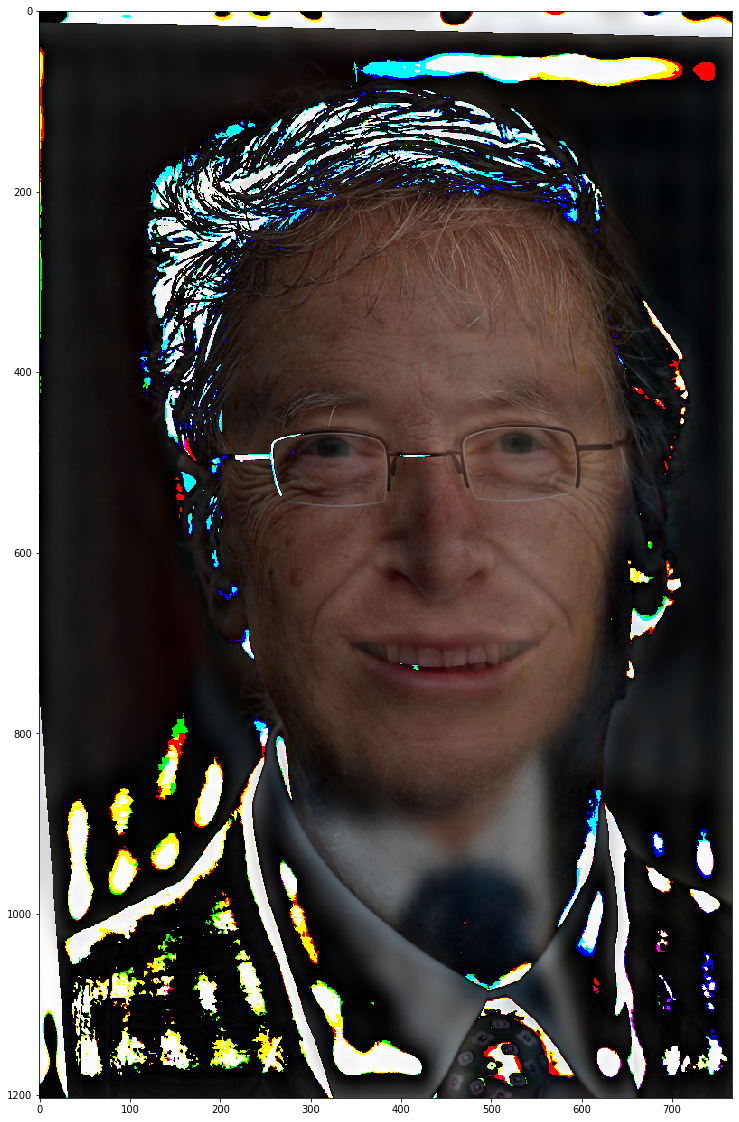

C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


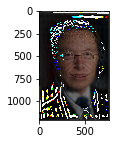

C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda-3\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


In [44]:


# _, axs = plt.subplots(1, 2, figsize=(14, 14))
# axs = axs.flatten()
# print(final_img_far.min(), final_img_far.max())
# axs[0].imshow(np.uint32(final_img_near))
# axs[1].imshow(np.uint32(final_img_far))
# plt.show()
plt.figure(figsize=(20,20))
plt.imshow(np.uint8(final_img_mix))
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(np.uint8(final_img_mix))
plt.show()


plt.imsave("Q4_14_hybrib_near.jpg", np.uint8(final_img_mix))
h = final_img_mix.shape[0]//10
w = final_img_mix.shape[1]//10
plt.imsave("Q4_15_hybrib_far.jpg", np.uint8(cv.resize(np.uint8(final_img_mix), (w,h),interpolation=cv.INTER_AREA)))


<div dir="rtl">
    تمام
</div>